 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Setting Path to whale_returns csv file
whale_path = Path(r"../module4challenge/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Setting path to algo_returns csv file
algo_path = Path(r"../module4challenge/Resources/algo_returns.csv")

In [7]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Setting path to sp_tsx_history csv file
sptsx_path = Path(r"../module4challenge/Resources/sp_tsx_history.csv")

In [11]:
# Reading S&P TSX 60 Closing Prices
sptsx_df = pd.read_csv(sptsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [12]:
# Check Data Types
sptsx_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sptsx_df["Close"] = sptsx_df["Close"].str.replace("$","", regex=True).str.replace(",","", regex=True)
sptsx_df["Close"] = sptsx_df["Close"].astype("float")

In [14]:
# Calculate Daily Returns
sp_daily_returns = sptsx_df.pct_change()
sp_daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [15]:
# Drop nulls
sp_daily_returns = sp_daily_returns.dropna().copy()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns = {"Close":"S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: xlabel='Date'>

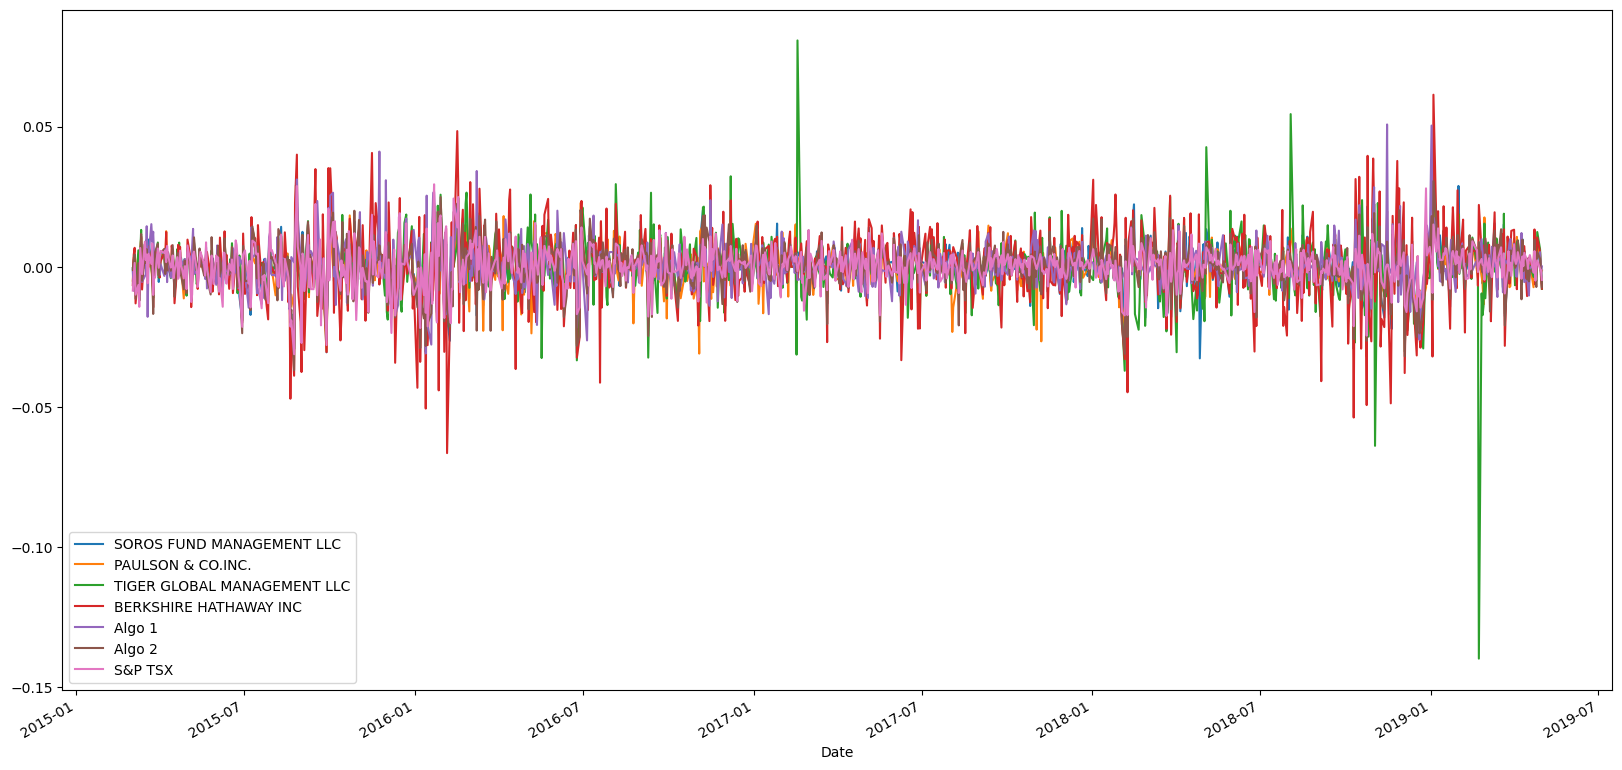

In [18]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot: title={'center': 'Cumulative Returns'}, xlabel='Date'>

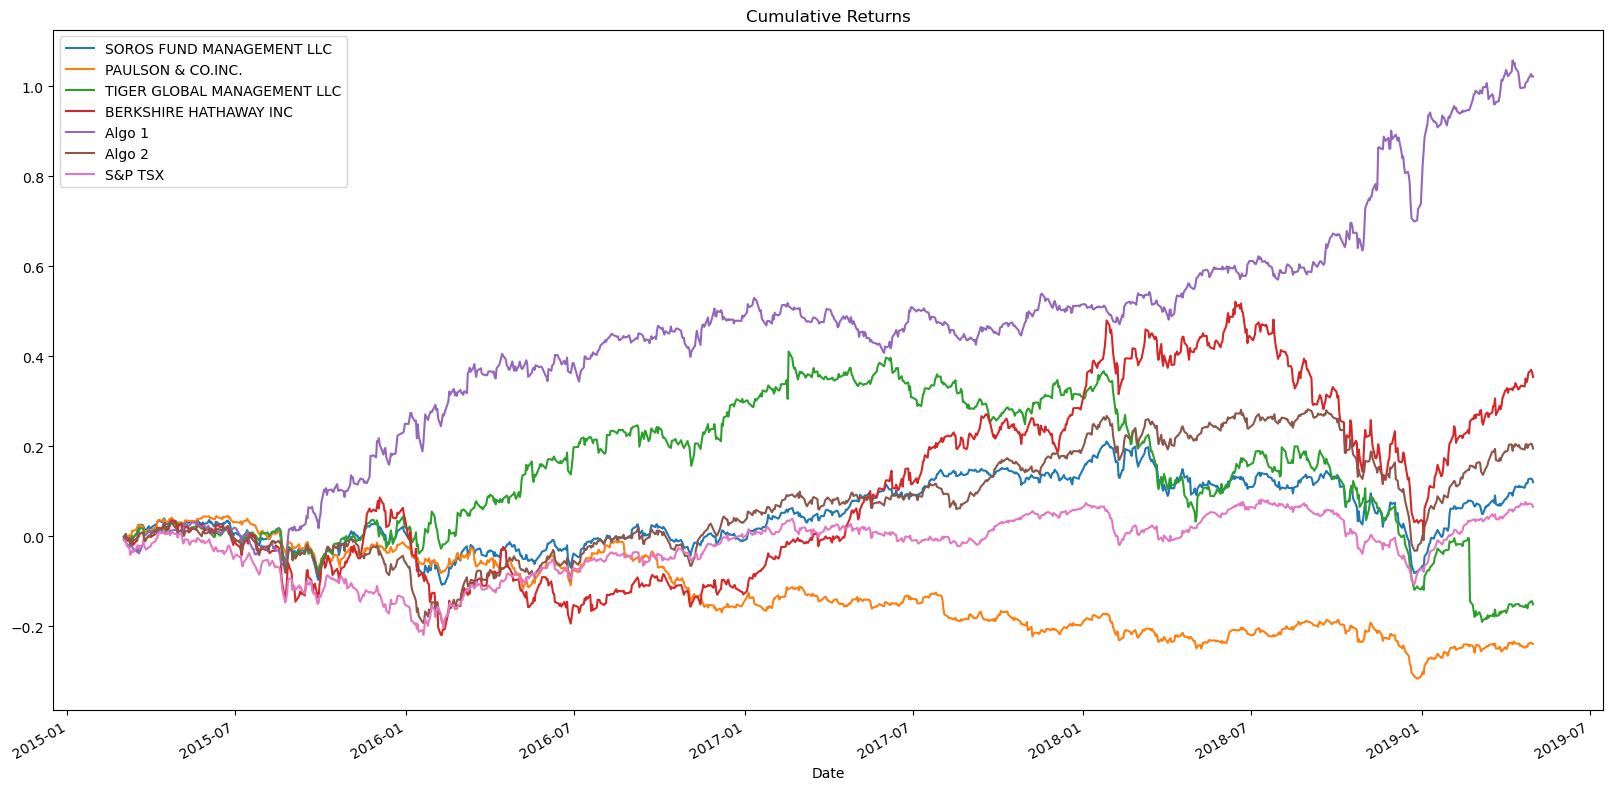

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot: >

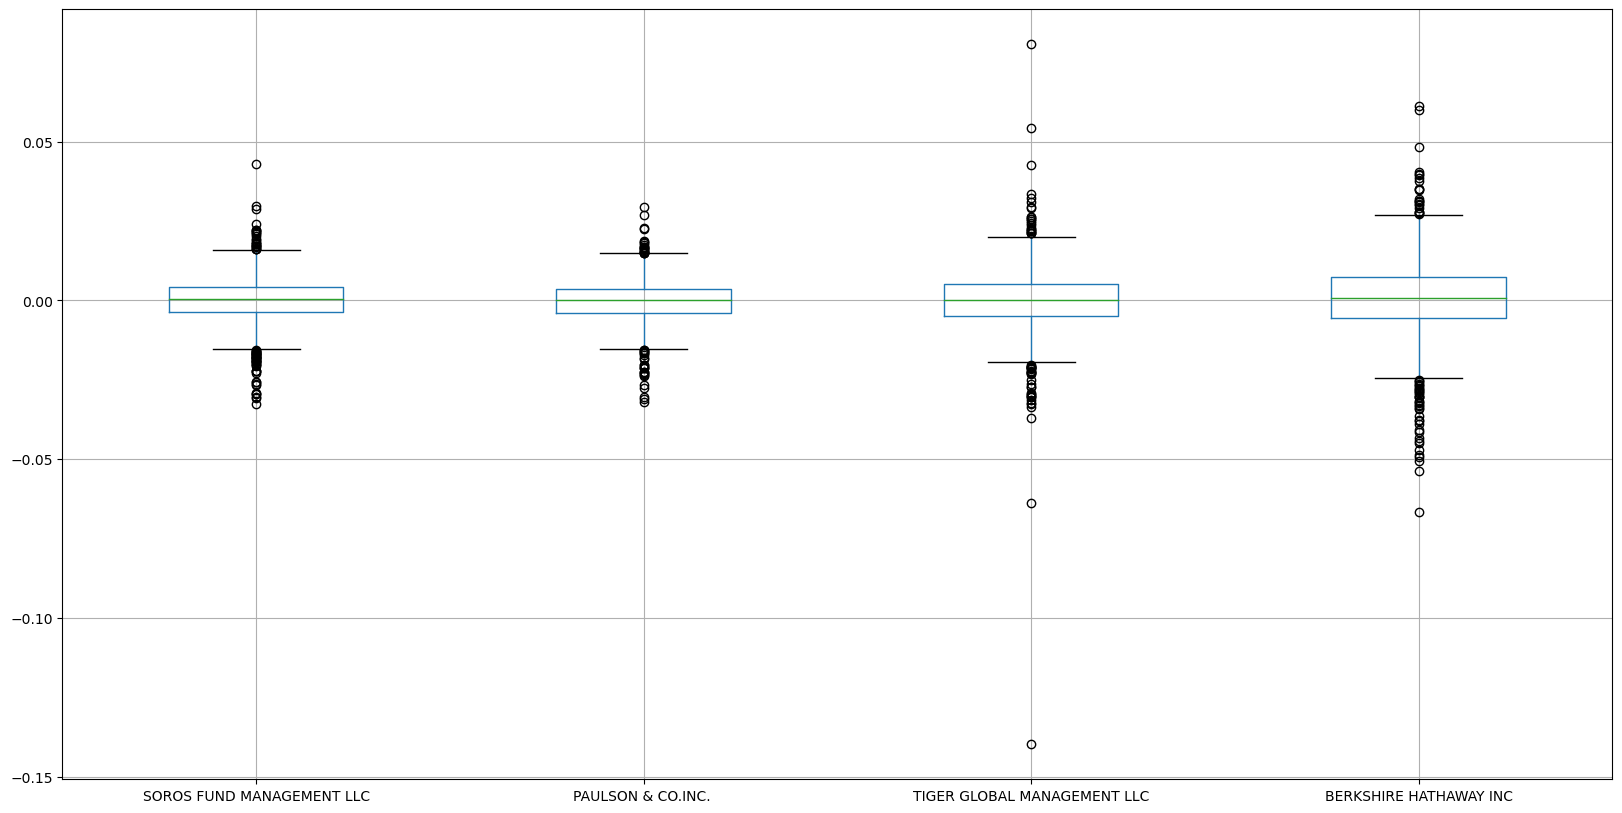

In [20]:
# Box plot to visually show risk
whale_df.boxplot(figsize=(20,10))

<AxesSubplot: >

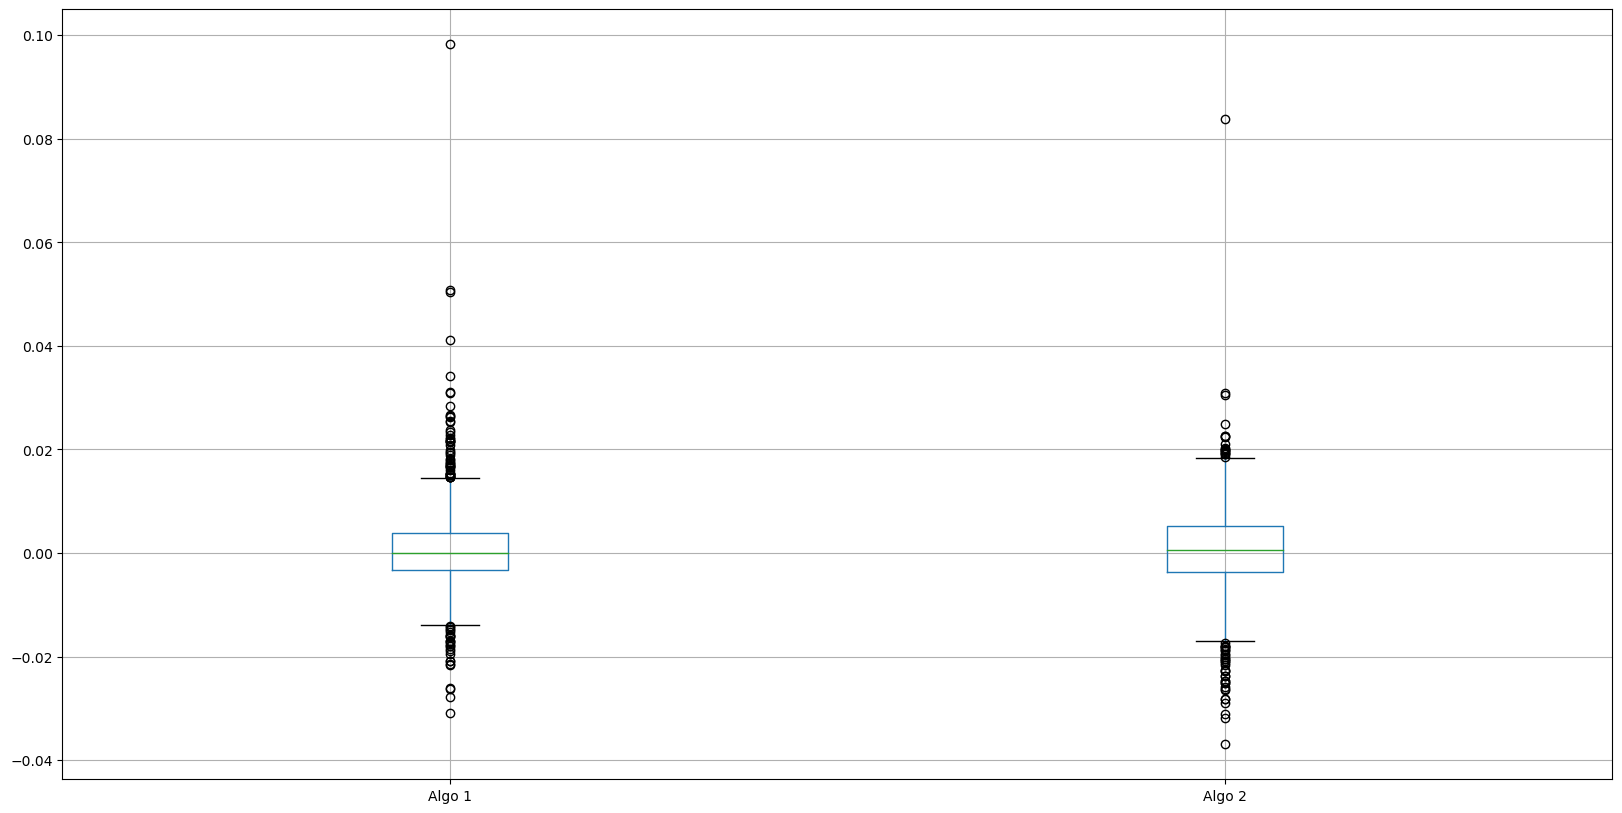

In [21]:
algo_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
all_portfolio = pd.concat([whale_df, algo_df], axis="columns", join="inner")
all_portfolio_std = all_portfolio.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007879
PAULSON & CO.INC.              0.007010
TIGER GLOBAL MANAGEMENT LLC    0.010876
BERKSHIRE HATHAWAY INC         0.012892
Algo 1                         0.007601
Algo 2                         0.008327
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = sp_daily_returns.std()

# Determine which portfolios are riskier than the S&P TSX 60
returns_std = returns_df.std()
returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
returns_annual = returns_df.std() * np.sqrt(252)
returns_annual

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: xlabel='Date'>

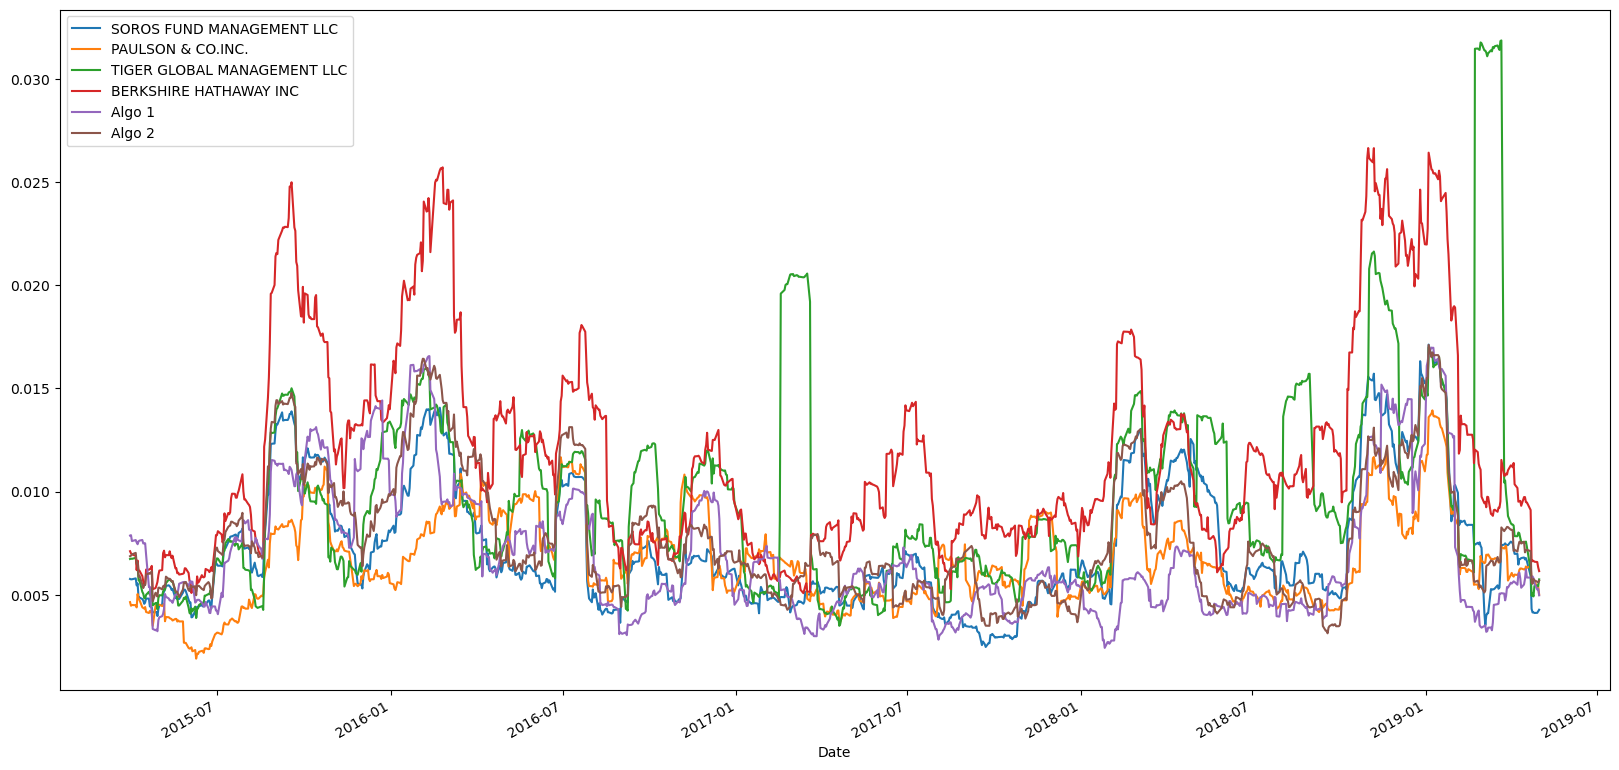

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_rolling = all_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios_rolling.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot: >

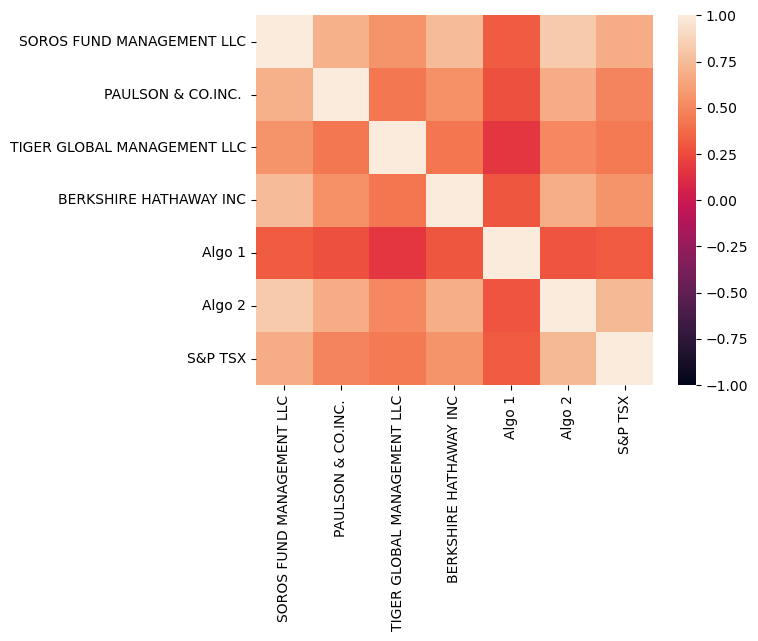

In [26]:
# Calculate the correlation
correlation = returns_df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

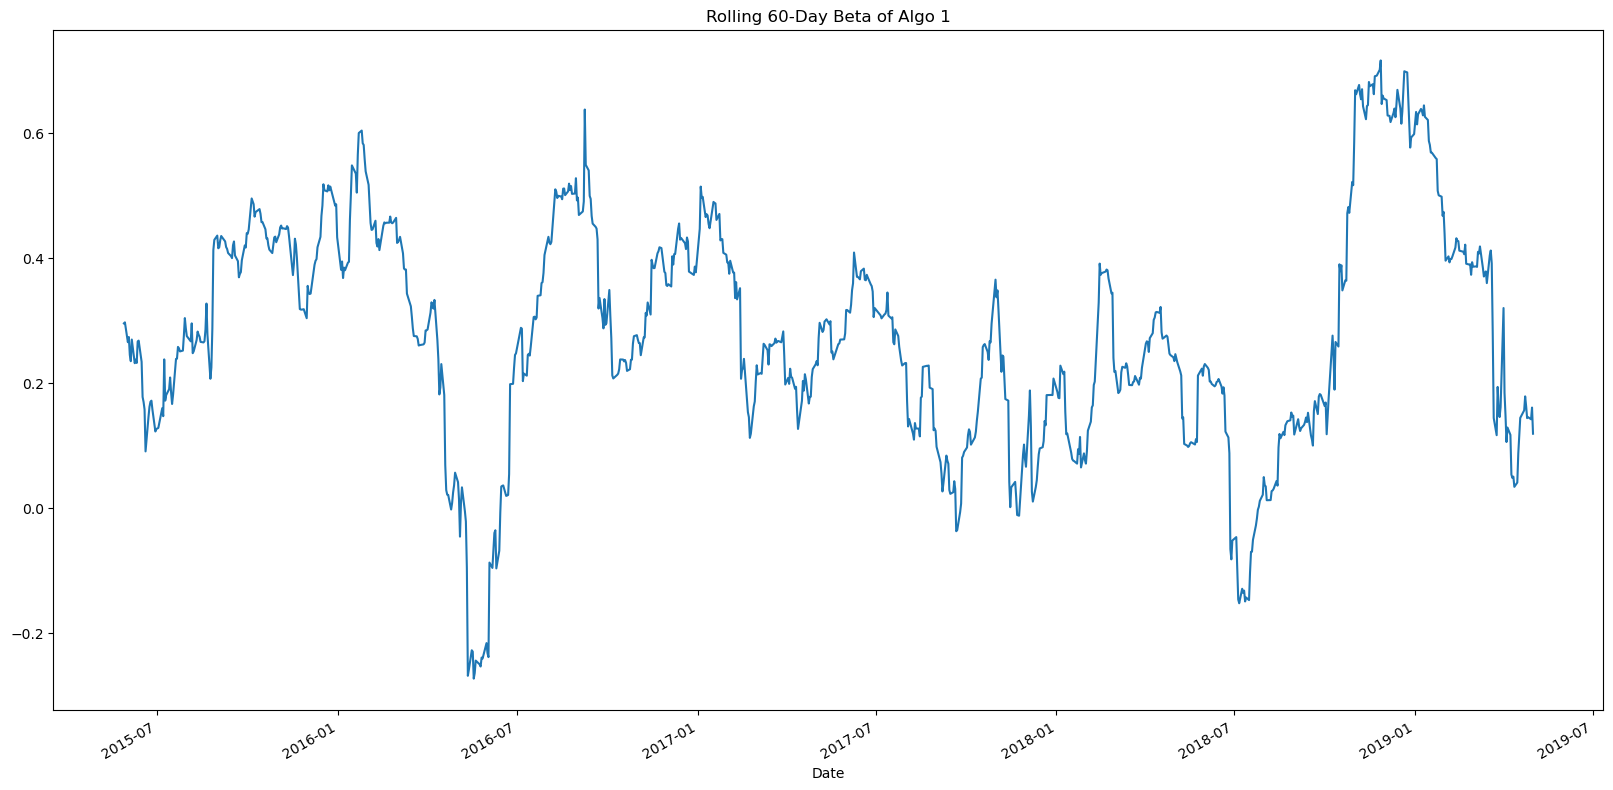

In [29]:
# Calculate covariance of a single portfolio
rolling_covariance = returns_df["Algo 1"].rolling(window=60).cov(returns_df["S&P TSX"])

# Calculate variance of S&P TSX
rolling_variance  = returns_df["S&P TSX"].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
returns_df.ewm(halflife=21).std()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002677            0.004968   
2015-03-06                   0.005349            0.004615   
2015-03-09                   0.004638            0.004471   
...                               ...                 ...   
2019-04-25                   0.006819            0.006342   
2019-04-26                   0.006819            0.006448   
2019-04-29                   0.006708            0.006357   
2019-04-30                   0.006617            0.006270   
2019-05-01                   0.006636            0.006175   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     0.001441                0.007624  0.004700   
2015-03-05                     0.002478                0.007020  0.004162   
2015-03-06                     0.004665                0.009387  0.003419   
2015-03-09                     0.005496                0.008066  0.002999   
...                                 ...                     ...       ...   
2019-04-25                     0.014811                0.010830  0.006526   
2019-04-26                     0.014764                0.010763  0.006433   
2019-04-29                     0.014575                0.010601  0.006378   
2019-04-30                     0.014336                0.010481  0.006310   
2019-05-01                     0.014166                0.010460  0.006208   

              Algo 2   S&P TSX  
Date                            
2015-03-03       NaN       NaN  
2015-03-04  0.002380  0.003648  
2015-03-05  0.002662  0.004936  
2015-03-06  0.007166  0.005205  
2015-03-09  0.006290  0.004517  
...              ...       ...  
2019-04-25  0.007500  0.004700  
2019-04-26  0.007418  0.004628  
2019-04-29  0.007304  0.004564  
2019-04-30  0.007200  0.004507  
2019-05-01  0.007238  0.004546  

[1029 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_std * np.sqrt(252))

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

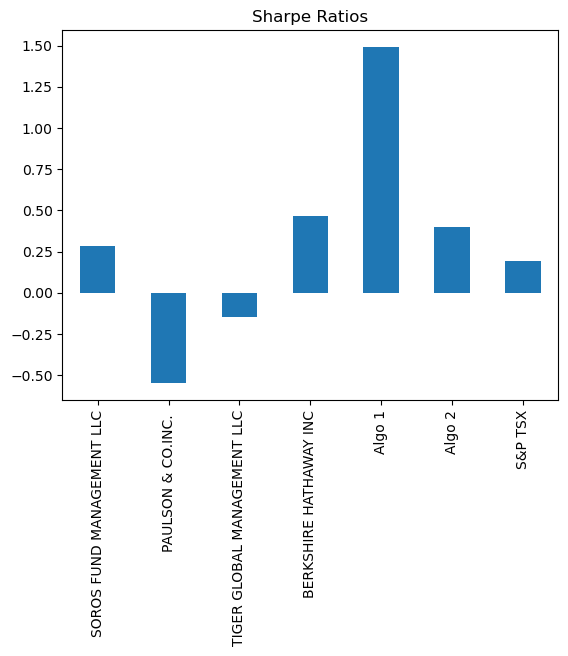

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Yes, The algorithmic strategies outperform both the market and whale portfolios. Only the Berkshire Hathaway stock outperforms Algo 2. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Reading data from 1st stock
l_path = Path(r"../module4challenge/Resources/l_historical.csv")
l_df = pd.read_csv(l_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.head()

Symbol  Close
Date                    
2018-01-02      L  57.99
2018-01-03      L  57.41
2018-01-04      L  57.42
2018-01-05      L  57.42
2018-01-08      L  56.86

In [71]:
# Reading data from 2nd stock
otex_path = Path(r"../module4challenge/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()

Symbol  Close
Date                    
2018-01-02   OTEX  43.58
2018-01-03   OTEX  43.07
2018-01-04   OTEX  42.91
2018-01-05   OTEX  42.57
2018-01-08   OTEX  42.16

In [72]:
# Reading data from 3rd stock
shop_path = Path(r"../module4challenge/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()

Symbol   Close
Date                     
2018-01-02   SHOP  132.06
2018-01-03   SHOP  135.15
2018-01-04   SHOP  137.46
2018-01-05   SHOP  137.26
2018-01-08   SHOP  139.51

In [79]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner")
combined_df.head()

Symbol  Close Symbol  Close Symbol   Close
Date                                                 
2018-01-02      L  57.99   OTEX  43.58   SHOP  132.06
2018-01-03      L  57.41   OTEX  43.07   SHOP  135.15
2018-01-04      L  57.42   OTEX  42.91   SHOP  137.46
2018-01-05      L  57.42   OTEX  42.57   SHOP  137.26
2018-01-08      L  56.86   OTEX  42.16   SHOP  139.51

In [80]:
# Reset Date index
combined_df.reset_index()

Date Symbol  Close Symbol  Close Symbol   Close
0   2018-01-02      L  57.99   OTEX  43.58   SHOP  132.06
1   2018-01-03      L  57.41   OTEX  43.07   SHOP  135.15
2   2018-01-04      L  57.42   OTEX  42.91   SHOP  137.46
3   2018-01-05      L  57.42   OTEX  42.57   SHOP  137.26
4   2018-01-08      L  56.86   OTEX  42.16   SHOP  139.51
..         ...    ...    ...    ...    ...    ...     ...
496 2019-12-20      L  67.90   OTEX  58.68   SHOP  513.22
497 2019-12-23      L  67.68   OTEX  57.89   SHOP  511.62
498 2019-12-24      L  67.67   OTEX  57.44   SHOP  525.39
499 2019-12-27      L  67.78   OTEX  57.70   SHOP  534.76
500 2019-12-30      L  67.33   OTEX  57.19   SHOP  517.79

[501 rows x 7 columns]

In [81]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.drop(columns=["Symbol"])

columns = ["L", "OTEX", "SHOP"]
combined_df.columns = columns

combined_df.head()

L   OTEX    SHOP
Date                            
2018-01-02  57.99  43.58  132.06
2018-01-03  57.41  43.07  135.15
2018-01-04  57.42  42.91  137.46
2018-01-05  57.42  42.57  137.26
2018-01-08  56.86  42.16  139.51

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [105]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_returns = combined_df.pct_change()
portfolio_returns = my_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [106]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([whale_df, algo_df, my_returns], axis="columns", join="inner")

In [107]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized `std`
all_returns_annual = all_returns.std() * np.sqrt(252)
all_returns_annual

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
L                              0.162907
OTEX                           0.225703
SHOP                           0.504079
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot: xlabel='Date'>

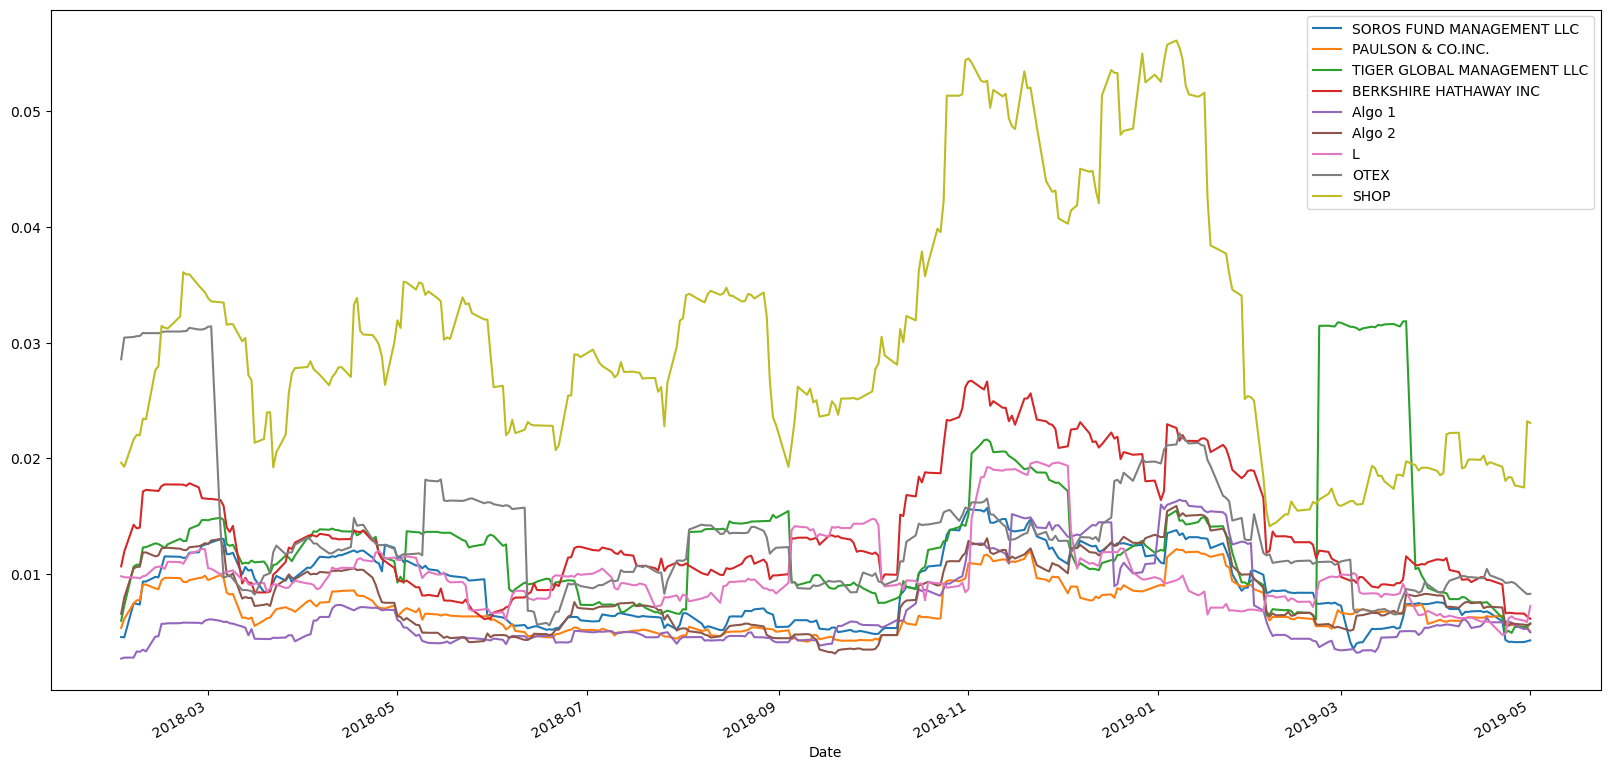

In [110]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot: >

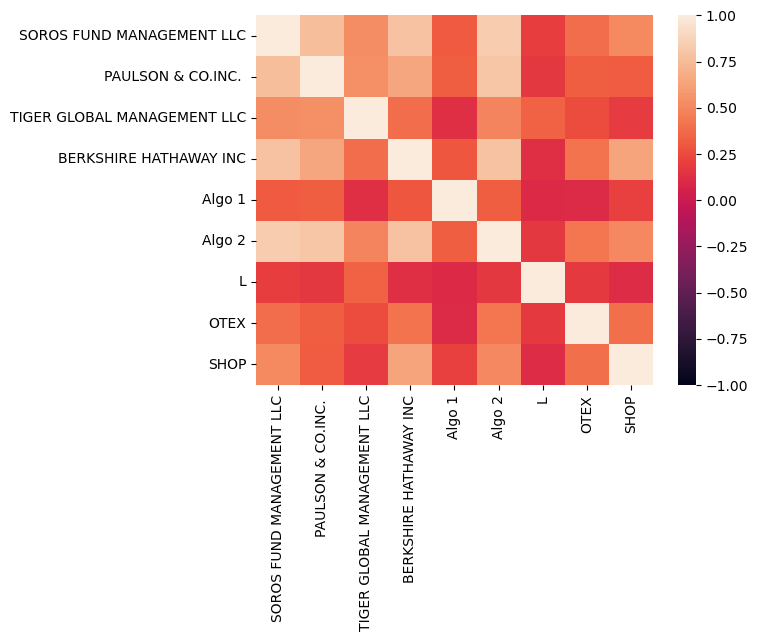

In [111]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()

sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot: title={'center': 'Rolling 60-Day Beta of My portfolio'}, xlabel='Date'>

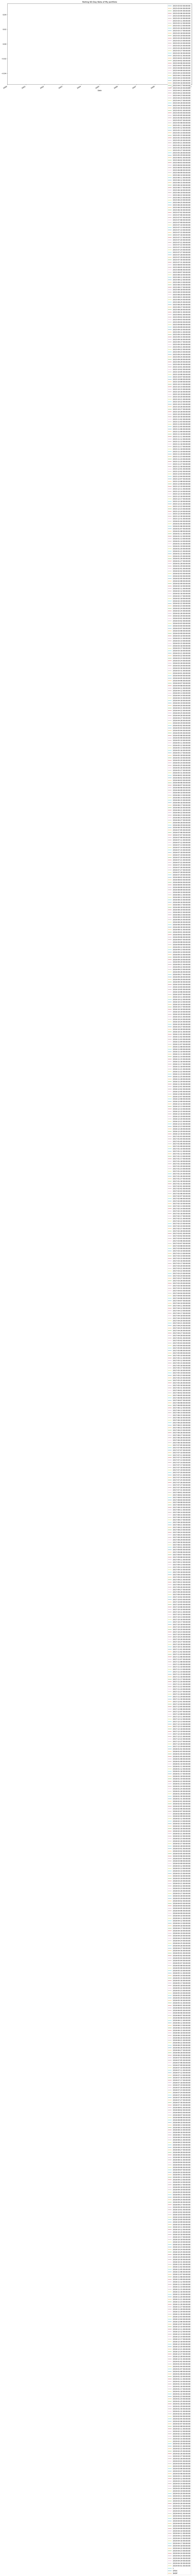

In [112]:
# Calculate and plot Beta
my_rolling_covariance = my_returns.rolling(window=60).cov(returns_df["S&P TSX"])

# Calculate variance of S&P TSX
my_rolling_variance  = returns_df["S&P TSX"].rolling(window=60).var()

# Computing beta
my_rolling_beta = my_rolling_covariance / my_rolling_variance

# Plot beta trend
my_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!